<a href="https://colab.research.google.com/github/Aakash-Sreeram/2216162_AIML_Bootcamp_2023/blob/main/ML/Malaria_Outbreak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/AIML Bootcamp 2023/outbreak_detect.csv")
print(df)

    maxTemp  minTemp  avgHumidity  Rainfall  Positive   pf Outbreak
0      29.0     18.0        49.74      0.00      2156  112       No
1      34.0     23.0        83.27     15.22     10717  677      Yes
2      40.0     23.0        50.74      0.00      1257  127       No
3       NaN     24.0        84.57     11.15      9693  482       No
4      34.0     24.0        59.16      9.06      4198  211       No
5      34.0     27.0        73.23      0.00     11808  712      Yes
6      31.0     24.0        88.77     41.40     10881  648      Yes
7      33.0     24.0        77.94     23.88      8830  459      Yes
8      31.0     24.0        84.57     11.15      9693  482       No
9      36.0     24.0        53.40      2.12      9310  549       No
10     32.0     23.0        57.50      0.00     13154  838      Yes
11     34.0     18.0        59.40      0.00      2197  136       No
12     42.0     24.0        49.43      2.19      3362  213       No
13     45.0     32.0        34.74      0.38     

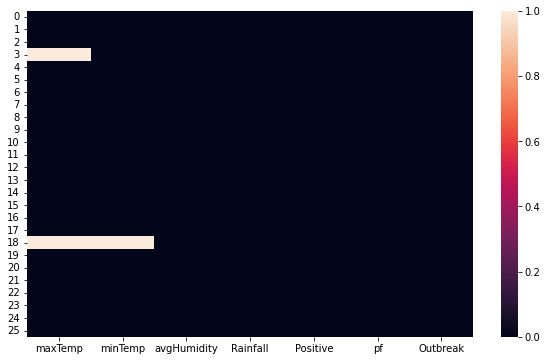

In [7]:
import seaborn as sb 
import matplotlib.pyplot as plt

def get_heatmap(df):
  plt.figure(figsize=(10,6))
  sb.heatmap(df.isnull())
  return plt.show()

get_heatmap(df)

In [8]:
from sklearn import preprocessing
#Label Encoding
LE=preprocessing.LabelEncoder()

#Fitting the techiniques to the dataset
df.Outbreak =LE.fit_transform(df.Outbreak)
df.head(26)

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,0
1,34.0,23.0,83.27,15.22,10717,677,1
2,40.0,23.0,50.74,0.00,1257,127,0
3,NaN,24.0,84.57,11.15,9693,482,0
4,34.0,24.0,59.16,9.06,4198,211,0
5,34.0,27.0,73.23,0.00,11808,712,1
6,31.0,24.0,88.77,41.40,10881,648,1
7,33.0,24.0,77.94,23.88,8830,459,1
8,31.0,24.0,84.57,11.15,9693,482,0
9,36.0,24.0,53.40,2.12,9310,549,0


In [9]:
mean_maxtemp=df['maxTemp'].mean()
mean_mintemp=df['minTemp'].mean()
import math as m
mean_outbreak=m.floor(df['Outbreak'].mean())
print(mean_maxtemp,mean_mintemp,mean_outbreak)

33.458333333333336 23.96 0


In [10]:
df['maxTemp']=df['maxTemp'].fillna(mean_maxtemp)
df['minTemp']=df['minTemp'].fillna(mean_mintemp)
df['Outbreak']=df['Outbreak'].fillna(mean_outbreak)

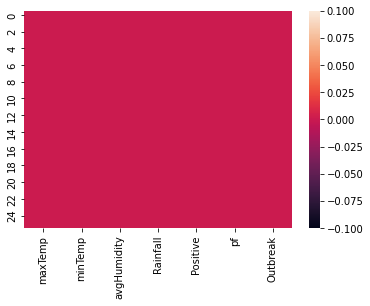

In [11]:
import seaborn as sb 
import matplotlib.pyplot as plt

def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sb.heatmap(df.isnull())
  return plt.show()

get_heatmap(df)

In [12]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values


In [13]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [16]:
model.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [17]:
y_pred=model.predict(x_test)
y_pred,x_test

(array([0, 0, 0, 0, 0, 0]),
 array([[ 0.96320195, -0.29472536, -1.2402083 , -0.90661305, -2.18725577,
         -1.48705879],
        [ 0.47265878,  0.97200254,  0.10660212, -0.53927756, -0.99594568,
         -1.04660053],
        [ 1.33110933,  1.81648781, -0.12010689, -0.42409609, -0.26660974,
         -0.03764382],
        [ 0.96320195,  1.39424517, -0.4317554 , -0.90661305,  0.8553275 ,
          1.8368646 ],
        [ 0.2273872 ,  1.39424517,  0.13410052, -0.90661305,  1.05147466,
          1.50908171],
        [ 0.2273872 , -2.40593852, -0.71101691, -0.90661305, -1.89871377,
         -1.44096432]]))

In [18]:
model.score(x_test,y_test)

0.6666666666666666

In [19]:
model.score(x_train,y_train)

0.95